In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

sb.set()

Functions

Descision Tree Functions

In [3]:
# A CONFUSION MATRIX FUNCTION

def confusion_matrix_func(x_train,x_test,y_train,y_test,depth):
    # Decision Tree using Train Data
    dectree = DecisionTreeClassifier(max_depth = depth)  # create the decision tree object
    dectree.fit(x_train, y_train)                    # train the decision tree model

    # Predict Legendary values corresponding to Total
    y_train_pred = dectree.predict(x_train)
    y_test_pred = dectree.predict(x_test)
    
    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Classification Accuracy: ", dectree.score(x_train, y_train))
    matrix = confusion_matrix(y_train,y_train_pred) 
    print(f"True Positive Rate: {matrix[1,1]/(matrix[1,1] + matrix[1,0])} ")
    print(f"False Positive Rate: {matrix[0,1]/(matrix[0,0] + matrix[0,1])} ")
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Classification Accuracy: ", dectree.score(x_test, y_test))
    matrix = confusion_matrix(y_test,y_test_pred) 
    print(f"True Positive Rate: {matrix[1,1]/(matrix[1,1] + matrix[1,0])} ")
    print(f"False Positive Rate: {matrix[0,1]/(matrix[0,0] + matrix[0,1])} ")
    print()

    # Plot the Confusion Matrix for Train and Test
    f, axes = plt.subplots(1, 2, figsize=(12, 4))
    sb.heatmap(confusion_matrix(y_train, y_train_pred),
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
    sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [4]:
creditcardData = pd.read_csv('credit-approval_csv.csv')
creditcardData.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved,Approved_Status
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+,Approved
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+,Approved
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+,Approved
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+,Approved
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+,Approved


In [5]:
print(f'Data Type: {type(creditcardData)}')
print(f'Data Dims: {creditcardData.shape}')

Data Type: <class 'pandas.core.frame.DataFrame'>
Data Dims: (690, 17)


In [6]:
creditcardData.dtypes

Gender              object
Age                float64
Debt               float64
Married             object
BankCustomer        object
EducationLevel      object
Ethnicity           object
YearsEmployed      float64
PriorDefault        object
Employed            object
CreditScore          int64
DriversLicense      object
Citizen             object
ZipCode            float64
Income               int64
Approved            object
Approved_Status     object
dtype: object

In [7]:
creditcardData.describe()

,Age,Debt,YearsEmployed,CreditScore,ZipCode,Income
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


In [8]:
creditcardDataStr = creditcardData.loc[:,creditcardData.dtypes == object]
creditcardDataStr.head()

,Gender,Married,BankCustomer,EducationLevel,Ethnicity,PriorDefault,Employed,DriversLicense,Citizen,Approved,Approved_Status
0,b,u,g,w,v,t,t,f,g,+,Approved
1,a,u,g,q,h,t,t,f,g,+,Approved
2,a,u,g,q,h,t,f,f,g,+,Approved
3,b,u,g,w,v,t,t,t,g,+,Approved
4,b,u,g,w,v,t,f,f,s,+,Approved


In [9]:
for var in creditcardDataStr[['Gender','Married','DriversLicense']]:
    print('---------------------------------------------------------------------')
    print(f'\t\t\t {var}')
    print(f'{creditcardData[var].unique()}')
    print(f'{creditcardDataStr[var].value_counts()}')

# Looks like we have a couple Nan Values

---------------------------------------------------------------------
			 Gender
['b' 'a' nan]
b    468
a    210
Name: Gender, dtype: int64
---------------------------------------------------------------------
			 Married
['u' 'y' nan 'l']
u    519
y    163
l      2
Name: Married, dtype: int64
---------------------------------------------------------------------
			 DriversLicense
['f' 't']
f    374
t    316
Name: DriversLicense, dtype: int64


In [10]:
creditcardDataStr_clean = creditcardDataStr.dropna()
creditcardDataStr_clean.head()

,Gender,Married,BankCustomer,EducationLevel,Ethnicity,PriorDefault,Employed,DriversLicense,Citizen,Approved,Approved_Status
0,b,u,g,w,v,t,t,f,g,+,Approved
1,a,u,g,q,h,t,t,f,g,+,Approved
2,a,u,g,q,h,t,f,f,g,+,Approved
3,b,u,g,w,v,t,t,t,g,+,Approved
4,b,u,g,w,v,t,f,f,s,+,Approved


In [11]:
print(f'Original Data Dims: {creditcardDataStr.shape}')
print(f'Cleaned Data Dims: {creditcardDataStr_clean.shape}')

Original Data Dims: (690, 11)
Cleaned Data Dims: (671, 11)


So we've removed 21 records that had NULL Values

In [12]:
for var in creditcardDataStr_clean[['Gender','Married','DriversLicense']]:
    print('---------------------------------------------------------------------')
    print(f'\t\t\t {var}')
    print(f'{creditcardDataStr_clean[var].unique()}')
    print(f'{creditcardDataStr_clean[var].value_counts()}')


---------------------------------------------------------------------
			 Gender
['b' 'a']
b    463
a    208
Name: Gender, dtype: int64
---------------------------------------------------------------------
			 Married
['u' 'y' 'l']
u    510
y    159
l      2
Name: Married, dtype: int64
---------------------------------------------------------------------
			 DriversLicense
['f' 't']
f    360
t    311
Name: DriversLicense, dtype: int64


<AxesSubplot:xlabel='Approved_Status', ylabel='Gender'>

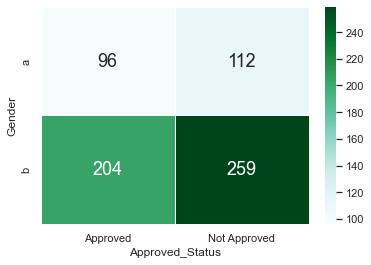

In [20]:
sb.heatmap(creditcardDataStr_clean.groupby(['Gender','Approved_Status']).size().unstack(),
    linewidths = 1, annot = True, fmt = 'g', annot_kws = {'size':18}, cmap = 'BuGn')

<AxesSubplot:xlabel='Approved_Status', ylabel='Married'>

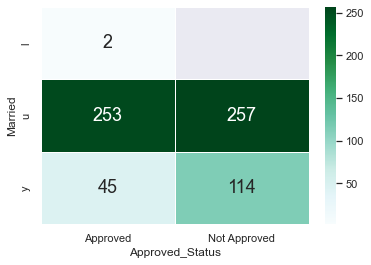

In [24]:
sb.heatmap(creditcardDataStr_clean.groupby(['Married','Approved_Status']).size().unstack(),
    linewidths = 1, annot = True, fmt = 'g', annot_kws = {'size':18}, cmap = 'BuGn')

<AxesSubplot:xlabel='Approved_Status', ylabel='DriversLicense'>

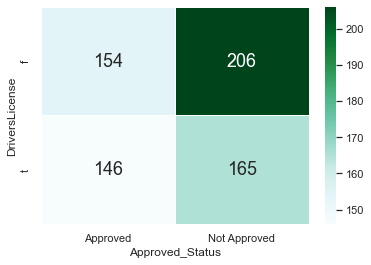

In [25]:
sb.heatmap(creditcardDataStr_clean.groupby(['DriversLicense','Approved_Status']).size().unstack(),
    linewidths = 1, annot = True, fmt = 'g', annot_kws = {'size':18}, cmap = 'BuGn')